# Pandas 데이터 요약

****

**발표자**  
DSC 박소희

**내용**  
1. 기초 통계 계산
2. 데이터 그룹화 (groupby)
3. 데이터 재구조화 (pivot과 melt)
4. 시각화

**데이터 셋**  
gapminder.tsv, scientists.csv, pew.csv

In [1]:
import pandas as pd

'1.5.3'

# 데이터 불러오기 

****

**1. 로컬에 저장된 gapminder.csv 파일을 불러와 변수 gapminder로 지정해주세요.**

In [2]:
# 아래에 코드를 작성 후 실행해 보세요.


**2. 로컬에 저장된 scientists.csv 파일을 불러와 변수 scientists로 지정해주세요.**
* 필요에 따라서 delimiter 옵션을 사용합니다.
* index_col은 0번째 열로 선택해주세요.

In [3]:
# 아래에 코드를 작성 후 실행해 보세요.


# 기초 통계 계산

****

## DataFrame

```python
DataFrame.describe(percentiles=None, include=None, exclude=None)
```

In [16]:
gapminder.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


## Series

### 수치형 기술 통계

In [23]:
gapminder['lifeExp']

0       28.801
1       30.332
2       31.997
3       34.020
4       36.088
         ...  
1699    62.351
1700    60.377
1701    46.809
1702    39.989
1703    43.487
Name: lifeExp, Length: 1704, dtype: float64

In [8]:
gapminder['lifeExp'].mean()
gapminder['lifeExp'].min()
gapminder['lifeExp'].max()
gapminder['lifeExp'].std()

12.917107415241187

### 범주형 기술 통계

In [10]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [12]:
gapminder['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [15]:
gapminder['continent'].value_counts()

Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: continent, dtype: int64

# 데이터 그룹화 (groupby)

****

**목적**: 데이터프레임을 특정 열을 기준으로 그룹화하여 그룹 단위로 연산을 수행합니다.  
**사용 사례**: 그룹화된 데이터에 대한 통계 또는 집계 연산을 수행할 때 사용됩니다. 예를 들어, 각 그룹에 대한 평균, 합계, 카운트 등을 계산할 수 있습니다.  

**집계함수 종류** : mean(), min(), max(), nunique(), value_counts(), count()
```python
DataFrame.groupby(by=None, axis=_NoDefault.no_default, sort=True, group_keys=True, dropna=True)
```
`dropna` 매개변수를 설정하여 그룹에 NA를 포함할지 여부를 선택할 수 있습니다. (기본 설정은 True 입니다.)

```python
데이터프레임.groupby('그룹화하고싶은열')['계산하고싶은열'].집계함수()
데이터프레임.groupby(['그룹화하고싶은열1','그룹화하고싶은열2'])[['계산하고싶은열1','계산하고싶은열1']].집계함수()
데이터프레임.groupby('그룹화하고싶은열').agg()
데이터프레임.groupby('그룹화하고싶은열').apply(lambda x: x)
```

## 그룹화한 데이터의 평균 구하기

In [25]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


**1. year에 따른 lifeExp의 평균값을 구하세요.**

In [ ]:
# 아래에 코드를 작성 후 실행해 보세요.


**2. year과 continent에 따른 lifeExp와 gdpPercap의 평균값을 구하세요.**

In [ ]:
# 아래에 코드를 작성 후 실행해 보세요.


## 그룹화한 데이터 개수 세기

**1. countinent별 속한 country의 행의 개수를 구하세요**

In [19]:
# 아래에 코드를 작성 후 실행해 보세요.


**2. continent에서 country의 데이터 개수를 출력하세요**

In [ ]:
# 아래에 코드를 작성 후 실행해 보세요.


**3. continent별로 고유한 country의 수를 구하시오**

In [ ]:
# 아래에 코드를 작성 후 실행해 보세요.


## 다중 통계량 구하기

**1. year별 lifeExp의 평균값과 분산값을 구하세요**

In [ ]:
# 아래에 코드를 작성 후 실행해 보세요.


## Apply로 사용자 정의 함수를 적용하기 

In [32]:
def get_top5(x):
    return x.sort_values('lifeExp').head()

In [33]:
gapminder.groupby('country').apply(get_top5)

country continent  year  lifeExp       pop   gdpPercap
country                                                                     
Afghanistan 0     Afghanistan      Asia  1952   28.801   8425333  779.445314
            1     Afghanistan      Asia  1957   30.332   9240934  820.853030
            2     Afghanistan      Asia  1962   31.997  10267083  853.100710
            3     Afghanistan      Asia  1967   34.020  11537966  836.197138
            4     Afghanistan      Asia  1972   36.088  13079460  739.981106
...                       ...       ...   ...      ...       ...         ...
Zimbabwe    1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623
            1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298
            1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960
            1692     Zimbabwe    Africa  1952   48.451   3080907  406.884115
            1693     Zimbabwe    Africa  1957   50.469   3646340  518.764268

[710 rows x 6 columns]

# 데이터의 재구조화

****

## Pivot

**목적:** 데이터를 편하게 보기 위해 사용!   
**사용 사례:** 데이터의 column을 index, columns, values로 설정하여 데이터를 펼칠 수 있습니다.  

```python
data.pivot(index, columns, values)
pd.pivot_table(data, index, columns, values, aggfunc)
```

`index`: Index로 보낼 column (index를 설정하지 않으면 기존 index로 정해짐)  
`columns`: columns 값으로 보낼 column  
`values`: value 값으로 보낼 column

**1. gapminder 데이터에서  'continent'와 'country'에 따른 각 연도별 'lifeExp' 값을 가지는 데이터프레임을 생성해보세요.**

In [ ]:
# 아래에 코드를 작성 후 실행해 보세요.


**2. gapminder 데이터에서 'year'에 따른 각 연도별 'lifeExp' 값을 가지는 데이터프레임을 생성해보세요.**

In [ ]:
# 아래에 코드를 작성 후 실행해 보세요.


## Melt
**목적**: DataFrame의 형태를 변경하여 'wide' 형식을 'long' 형식으로 변환합니다.  
**사용 사례**: 열 이름이 변수를 나타내고 열 값이 해당 변수의 관측치를 나타낼 때 사용됩니다. 주로 데이터 정리 및 시각화에 유용합니다.

```python
pd.melt(data, id_vars, var_name, value_name)
```
`data`: melt를 진행할 DataFrame 지정  
`id_vars`: 위치를 그대로 유지할 column의 이름을 지정 (None이면 id_vars를 뺀 나머지 column으로 자동 지정)  
`var_name`: unpivot할 column 이름 지정 (None이면 variable을 이름으로 함)  
`value_name`: value column 이름 지정 (None이면 value로 지정됨)

In [3]:
pew = pd.read_csv('./datafile/pew.csv')
pew.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


**1. 11개의 소득정보 열을 행으로 옮기려고 합니다. religion 열을 고정해서 pivot 해보세요**

In [ ]:
# 아래에 코드를 작성 후 실행해 보세요.


**2. pivoting 된 var 열의 이름과 value 열의 이름을 melt 함수에서 변경해보세요**

In [ ]:
# 아래에 코드를 작성 후 실행해 보세요.


# 시각화

****

## Bar plot
* 범주형 변수 1개와 숫자형 변수 1개를 시각화할 때 쓰임

**한국에서 년도별 인구수**

In [58]:
kor_df = gapminder[gapminder['country']=='Korea, Rep.']

<Axes: xlabel='year'>

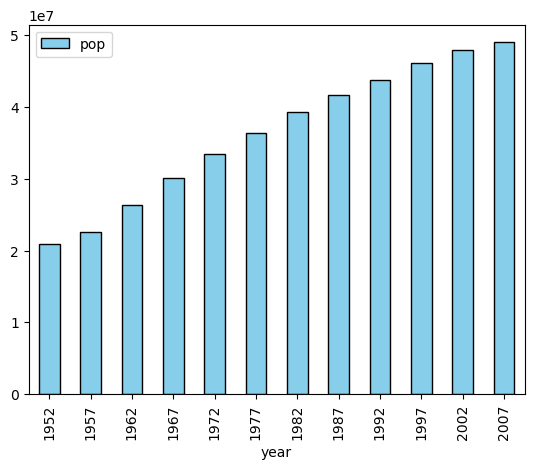

In [59]:
kor_df.plot(x='year', y='pop', kind='bar', color='skyblue', edgecolor='black')

## 히스토그램
* 숫자형 변수 1개를 시각화할 때 쓰임

**기대수명의 분포**

<Axes: ylabel='Frequency'>

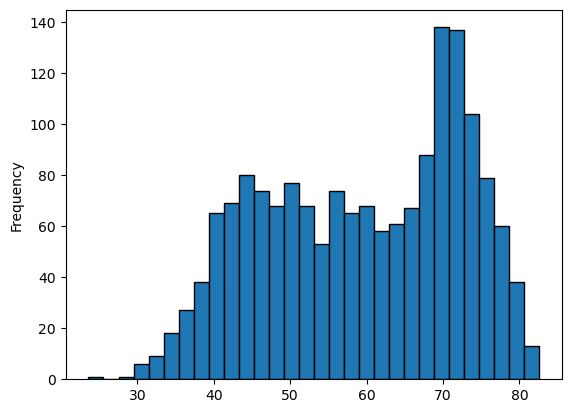

In [32]:
gapminder['lifeExp'].plot(kind='hist', bins=30, edgecolor='black')

## 박스플롯
* 숫자형 변수를 시각화할 때 쓰임

**대륙별 기대수명의 분포의 비교**

lifeExp    Axes(0.125,0.11;0.775x0.77)
dtype: object

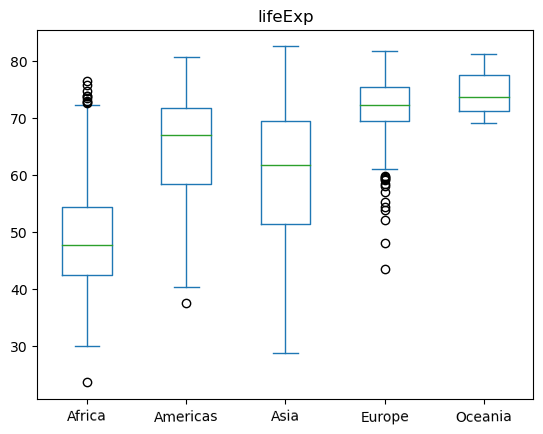

In [56]:
gapminder.plot(kind='box', column='lifeExp', by='continent')

## Scatter plot
* 숫자형 변수가 2개를 시각화할 때 쓰임

**1인당 국민 소득과 기대수명의 관계**

<Axes: xlabel='gdpPercap', ylabel='lifeExp'>

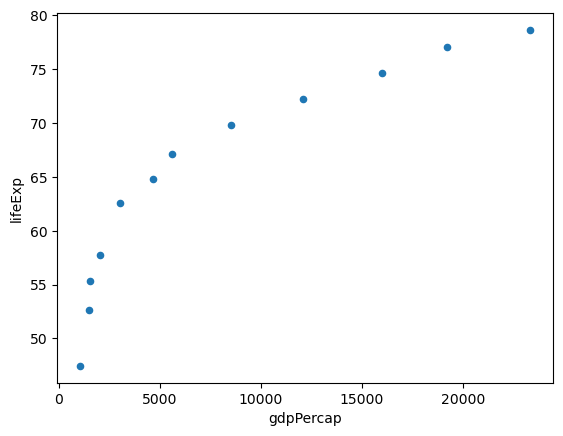

In [71]:
df.plot(x='gdpPercap', y='lifeExp', kind='scatter')